# Predicting Profitable Customer Segments

#### Context
Marketing is a key component of every modern business. Companies continuously re-invest large cuts of their profits for marketing purposes, trying to target groups of customers who have the potential to bring back the highest Return On Investment for the company. The cost of marketing can be very high though, meaning that the decision about which customer group to target is of great financial importance.

This dataset was made available by an online retail company that has collected historical data about such groups of customers, tracked the profitability of each individual group after the respective marketing campaign and retrospectively assessed whether investing on marketing spend for that group was a good choice.

#### Content
In order to enable machine learning experimentation, this dataset has been structured as follows:

Each row is a comparison between two groups of potential customers:
1) Column names starting with "g1_" represent characteristics of the first customer group (these were known before the campaign was run)
2) Column names starting with "g2_" represent characteristics of the second customer group (these were known before the campaign was run)
3) Column names starting with "c_" are features representing some comparison of the two groups (also known before the campaign was run)

The last column, named "target", is categorical, with 3 categories:  
0 - none of the two groups were profitable  
1 - group1 turned out to be more profitable  
2 - group2 turned out to be more profitable  

### Project Goal:  

The goal of this task is to determine which group of customers are worth targeting given the following dataset. The data is highly ananomized so there isn't a good possibility to apply domain expertise.

### Step 1: Import the necessary libraries and load the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data into a DataFrame
data = pd.read_csv('customerTargeting.csv')

# Explore the dataset
data.head()



,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


### Step 2: Data exploration and preprocessing:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [3]:
# Summary statistics of the numeric features
data.describe()



,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,...,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,...,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,...,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,...,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,...,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.001070,0.00000,-0.119378,-0.012487,0.000000,1.850000,1.000000
75%,2.800000,21.000000,15.000000,36.000000,16.000000,20.000000,15.000000,16.000000,21.000000,7.000000,...,0.654627,0.490504,0.410915,0.450104,0.00000,1.809334,1.035235,0.054825,2.020000,2.000000
max,23.000000,52.000000,47.000000,94.000000,20.000000,61.000000,43.000000,48.000000,52.000000,48.000000,...,4.821136,4.396281,2.987136,2.830550,2.00000,12.562698,8.209578,0.666667,4.330000,2.000000


In [4]:

# Check for any missing values
data.isnull().sum()


g1_1      0
g1_2      0
g1_3      0
g1_4      0
g1_5      0
         ..
c_25      0
c_26      0
c_27      0
c_28      0
target    0
Length: 71, dtype: int64

In [5]:
missing_count = data.isnull().sum() # the count of missing values
value_count = data.isnull().count() # the count of all values
missing_perc = round(missing_count / value_count * 100,2) #  the percentage of missing values
missing_df = pd.DataFrame({'count':missing_count, 'percentage': missing_perc}) # create a dataframe
missing_df

,count,percentage
g1_1,0,0.0
g1_2,0,0.0
g1_3,0,0.0
g1_4,0,0.0
g1_5,0,0.0
...,...,...
c_25,0,0.0
c_26,0,0.0
c_27,0,0.0
c_28,0,0.0


In [6]:

# Check for any duplicate rows
data.duplicated().sum()


0

In [9]:
corr_df = data.corr()
corr_df #unhide the output to see the full set of corrolation coeficients

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
g1_1,1.000000,-0.164910,-0.224802,-0.200795,0.343122,-0.161452,0.142321,-0.187718,0.137807,-0.317850,...,-0.647745,-0.623716,0.031244,-0.206267,-0.140807,-0.531982,-0.528387,-0.226197,0.039719,0.232350
g1_2,-0.164910,1.000000,0.811029,0.962898,-0.447685,0.942299,0.481965,0.832117,0.589023,0.695123,...,0.290130,0.293806,0.213392,-0.180104,0.053655,0.161989,0.162297,0.060257,0.188993,-0.042702
g1_3,-0.224802,0.811029,1.000000,0.938811,-0.546881,0.801764,0.409913,0.916102,0.359642,0.591603,...,0.401097,0.404894,0.273959,-0.232708,0.066917,0.241096,0.245965,0.095251,0.260013,-0.062412
g1_4,-0.200795,0.962898,0.938811,1.000000,-0.515861,0.924652,0.472860,0.912525,0.512701,0.682174,...,0.355847,0.359763,0.252017,-0.213389,0.062459,0.206593,0.209020,0.079417,0.231218,-0.053932
g1_5,0.343122,-0.447685,-0.546881,-0.515861,1.000000,-0.389234,0.291838,-0.427415,0.257780,-0.720973,...,-0.602242,-0.583982,-0.432377,0.385178,-0.100876,-0.331556,-0.343214,-0.148368,-0.333108,0.087913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_25,-0.531982,0.161989,0.241096,0.206593,-0.331556,0.182733,-0.123786,0.219554,-0.135183,0.326788,...,0.558384,0.541635,0.145867,0.151823,0.107238,1.000000,0.883036,0.151220,0.212511,-0.147813
c_26,-0.528387,0.162297,0.245965,0.209020,-0.343214,0.189968,-0.119060,0.227645,-0.133256,0.331220,...,0.576090,0.543012,0.178698,0.190888,0.119079,0.883036,1.000000,0.517123,0.204904,-0.149233
c_27,-0.226197,0.060257,0.095251,0.079417,-0.148368,0.081674,-0.033601,0.102488,-0.039854,0.126861,...,0.236609,0.192345,0.133660,0.146864,0.046962,0.151220,0.517123,1.000000,0.075477,-0.062142
c_28,0.039719,0.188993,0.260013,0.231218,-0.333108,0.275988,-0.031042,0.302612,-0.034080,0.355773,...,0.255449,0.246087,0.253444,-0.185535,0.057389,0.212511,0.204904,0.075477,1.000000,0.021353


<Axes: >

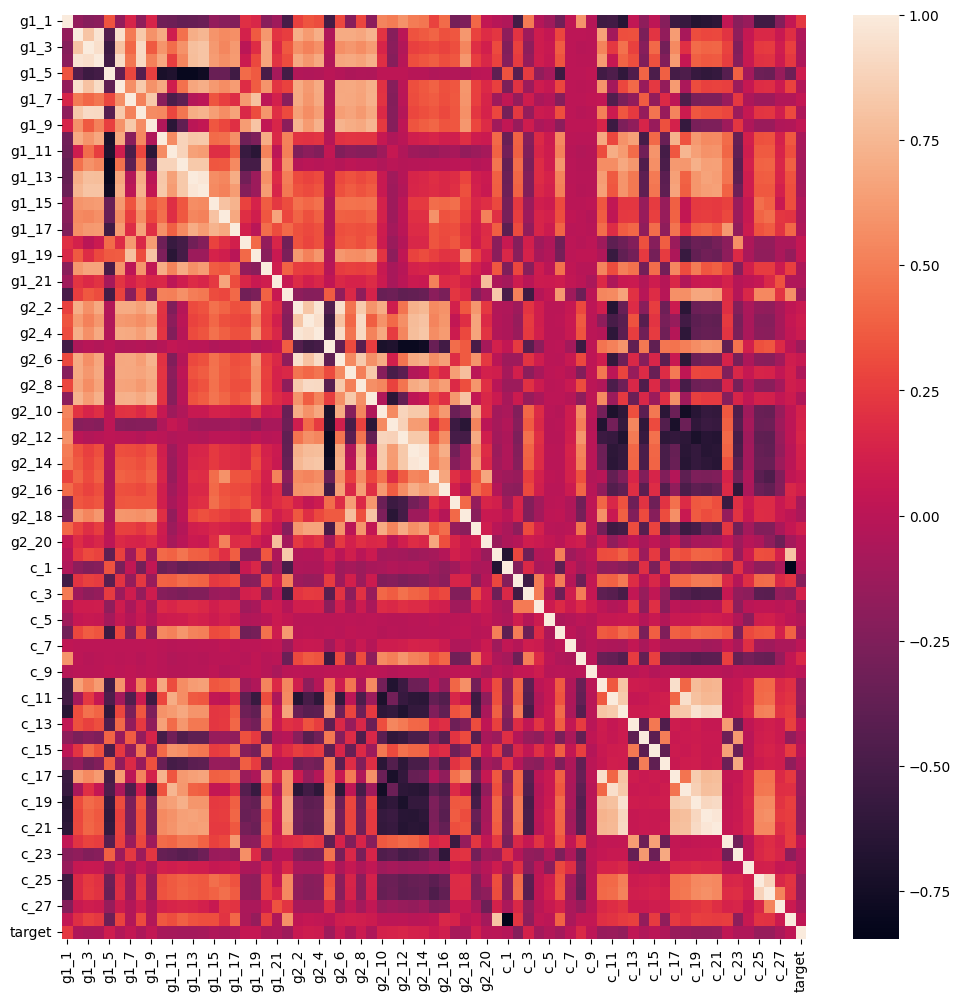

In [10]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12))

sns.heatmap(corr_df)

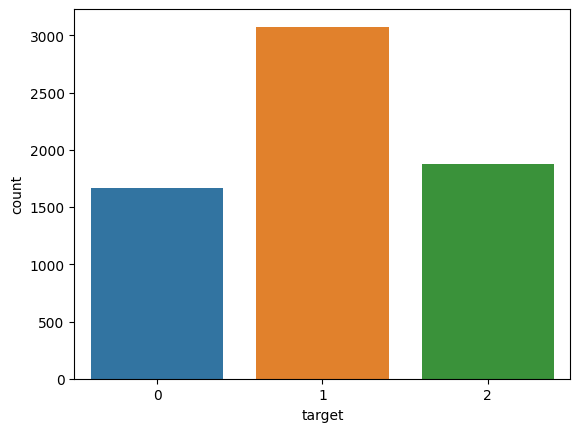

In [15]:
sns.countplot(data=data, x='target')
plt.show()

In [13]:
data['target'].value_counts()

target
1    3076
2    1877
0    1667
Name: count, dtype: int64

In [16]:
def enc_0(num):
    if num == 0:
        return 1
    else:
        return 0

def enc_1(num):
    if num == 1:
        return 1
    else:
        return 0

def enc_2(num):
    if num == 2:
        return 1
    else:
        return 0

data['target_0'] = pd.Series([enc_0(x) for x in data.target], index=data.index)
data['target_1'] = pd.Series([enc_1(x) for x in data.target], index=data.index)
data['target_2'] = pd.Series([enc_2(x) for x in data.target], index=data.index)

## One hot encoding the outcomes didn't help any of the models I tried
## But there is one possibility with this I left unexplored, see my final thoughts for more details

In [17]:
corr_df = data.corr()
corr_df = corr_df.sort_values(by=['target'])
pd.DataFrame(corr_df['target'])

,target
target_0,-0.818817
c_2,-0.219371
c_12,-0.167140
c_19,-0.164224
c_20,-0.162834
...,...
g2_12,0.144449
c_8,0.162362
g1_1,0.232350
target_2,0.833290


In [18]:
# There are other methods of generating this in less code
# I just want my mistakes to be a little easier to spot
# the d_x refers to the delta between g1_x and g2_x
data['d_1'] = data['g1_1'] - data['g2_1']
data['d_2'] = data['g1_2'] - data['g2_2']
data['d_3'] = data['g1_3'] - data['g2_3']
data['d_4'] = data['g1_4'] - data['g2_4']
data['d_5'] = data['g1_5'] - data['g2_5']
data['d_6'] = data['g1_6'] - data['g2_6']
data['d_7'] = data['g1_7'] - data['g2_7']
data['d_8'] = data['g1_8'] - data['g2_8']
data['d_9'] = data['g1_9'] - data['g2_9']
data['d_10'] = data['g1_10'] - data['g2_10']
data['d_11'] = data['g1_11'] - data['g2_11']
data['d_12'] = data['g1_12'] - data['g2_12']
data['d_13'] = data['g1_13'] - data['g2_13']
data['d_14'] = data['g1_14'] - data['g2_14']
data['d_15'] = data['g1_15'] - data['g2_15']
data['d_16'] = data['g1_16'] - data['g2_16']
data['d_17'] = data['g1_17'] - data['g2_17']
data['d_18'] = data['g1_18'] - data['g2_18']
data['d_19'] = data['g1_19'] - data['g2_19']
data['d_20'] = data['g1_20'] - data['g2_20']
data['d_21'] = data['g1_21'] - data['g2_21']

In [19]:
features = ['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6','c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13',
            'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25',
            'c_26', 'c_27', 'c_28', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10',
            'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21']#,
            #'g1_1', 'g1_5', 'g2_12', 'g2_21', 'g2_1', 'g2_13', 'g2_11']

I had expirimented with many different features to include, ultimately the delta variable set proved to add the most value. I commented out some of the variables that had boosted the models accuracy but had an unintended side affect (described below).

In [20]:
X = data[features]
y = data['target'] #[['target_0', 'target_1', 'target_2']] # one hot encoding did not improve performance

In [21]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, test_size=.2)

In [23]:
hgb = HistGradientBoostingClassifier()
hgb.fit(train_X, train_y)
ls_preds = hgb.predict(val_X)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', accuracy_score(val_y, ls_preds))


Score of Histogram-based Gradient Boosting Regression Tree:  0.5664652567975831


<Axes: >

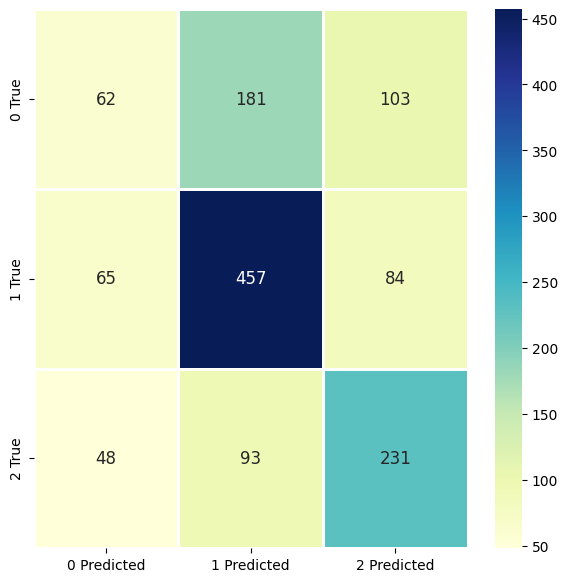

In [24]:
from sklearn.metrics import confusion_matrix

confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])


The above model is my final model. I had some other models that were more accurate but this model did a better job of catching True negitives. through feature engineering, hyperparameter tuning, and feature selection I was able to get slightly higher accuracy in other models but each of them wouldn't predict a 0 state (which remember meant that neither group was profitable to market to).

### Accuracy
This model is only 56% accurate. The model had to detect one of 3 distinct outcomes, if each of those outcomes were equally likely then deciding at random would give us an accuracy of 33%. Since group one being more profitable is the most common outcome, a model can be 46% accurate just by always predicting target to be 1.

Below there are several other models hidden, which had decent enough performance to be worth a look, feel free to unhide them if your curious. The other visible model below is the one I initially set forth to test out, the Stacked Classifier, but I'm not hugely thrilled with its performance.

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=90, random_state=0)
etc.fit(train_X, train_y)
ls_preds = etc.predict(val_X)
print('Score of Etremely Random Forest: ', accuracy_score(val_y, ls_preds))

Score of Etremely Random Forest:  0.5649546827794562


<Axes: >

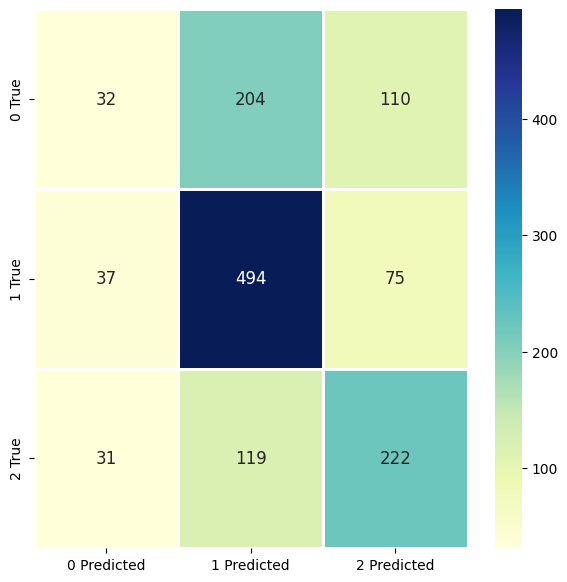

In [26]:
from sklearn.metrics import confusion_matrix

confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])

In [27]:
from sklearn.ensemble import BaggingClassifier
baggin = BaggingClassifier(n_estimators=90)
baggin.fit(train_X, train_y)
ls_preds = baggin.predict(val_X)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', accuracy_score(val_y, ls_preds))

Score of Histogram-based Gradient Boosting Regression Tree:  0.574773413897281


<Axes: >

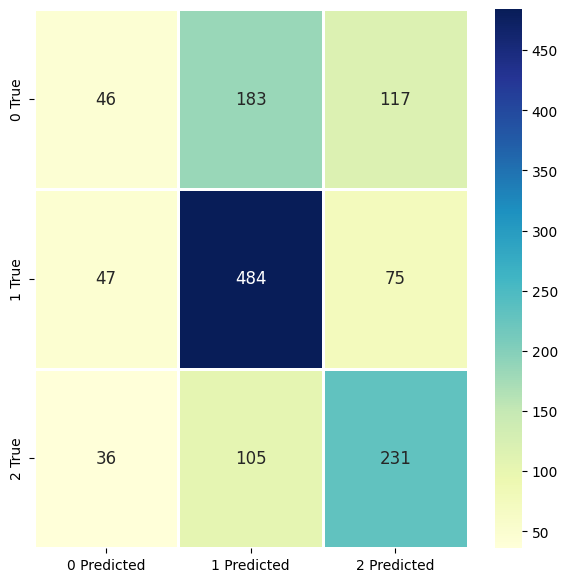

In [28]:
confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])

In [29]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

estimators = [
    ('rf', ExtraTreesClassifier(n_estimators=90, random_state=0)),
    ('hgb', RandomForestClassifier(n_estimators=40)),
    ('ada', HistGradientBoostingClassifier()),
    ('bag', BaggingClassifier(n_estimators=70))
    ]
clf = StackingClassifier(estimators=estimators, final_estimator=AdaBoostClassifier(n_estimators=40))
clf.fit(train_X, train_y)
ls_preds = clf.predict(val_X)
print('Score of stacked: ', accuracy_score(val_y, ls_preds))

Score of stacked:  0.5808157099697885


<Axes: >

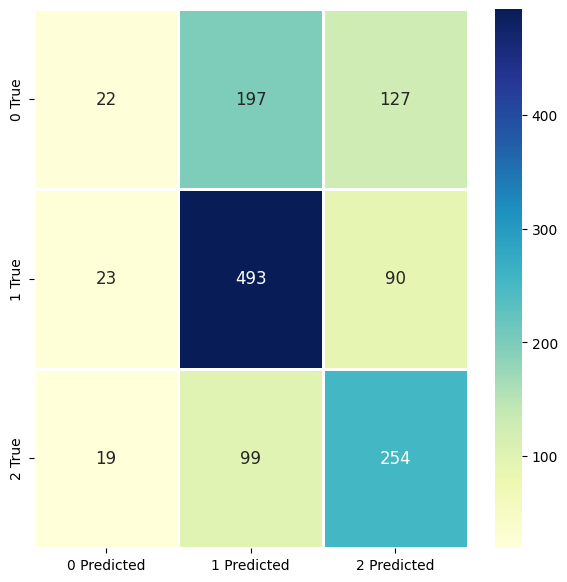

In [30]:
confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])

### Final Thoughts:
I set out to try out the StackingClassifier and I can say I was successful with that. There is still room for improvement in the model, and I imagine more signal to tease out of the dataset. I look forward to see what others try with this task, I'm really curious what I may not have found.

Each of the models that I created did rather poorly at predicting an outcome of 0 (where neither group was profitable). One possibility that I did not explore was the option of training a seperate model (probably a decision tree) and tune it to just detect 0 or not 0 outcome. Including such model in the stack could have been useful.

I'll also acknowledge that I'm not overly experienced with model stacking/blending so I may have overlooked some better model designs.

Currently I'm challenging myself to complete one Kaggle Task per week. If you have any constructive feedback or want to collaborate with me on a future task feel free to message me or leave a comment on this notebook.

As always upvotes are appreciated.